In [3]:
using DynamicalSystems, BenchmarkTools, PyPlot, ProgressMeter, DelimitedFiles

In [4]:
# z = [R0, RSP, S]
function immune!(dz, z, p, t)
    b=0.9;
    d=1.;
    kL=1.;
    alpha=p[1];
    beta=p[2];
    s=p[3];
    dz[1] = b*z[1]-z[1]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[2] = (b-s)*z[2]-z[2]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[3] = s*z[2]+(d-alpha*z[4]/(1+z[4]))*z[3]-z[3]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[4] = kL*beta*(1-z[1]-z[2]-z[3]-z[5])-alpha*(z[4]/(1+z[4]))-z[4]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[5] = (d-alpha*z[4]/(1+z[4]))*z[5]-z[5]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
 
    return nothing
end

immune! (generic function with 1 method)

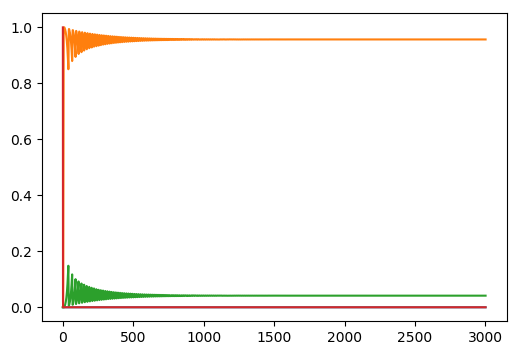

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132d72b38>
 PyObject <matplotlib.lines.Line2D object at 0x132d72d30>
 PyObject <matplotlib.lines.Line2D object at 0x1479a70b8>
 PyObject <matplotlib.lines.Line2D object at 0x1479a7400>

In [5]:
# parameters=[alpha,beta,s] initial conds=[X0, Xs, Y, p, Y0]
hh = ContinuousDynamicalSystem(immune!, [0., 0.001, 0., 0.001, 0.999], [10., 50., 0.001])
tr = trajectory(hh, 3000.0, dt = 1.)
t1=1:size(tr)[1];
figure(figsize = (6,4))
p1=plot(t1,tr[:,1],t1,tr[:,2],t1,tr[:,3],t1,tr[:,5])

In [6]:
tr[end,:]

5-element StaticArrays.SArray{Tuple{5},Float64,1,5}:
 0.0                  
 0.9558553976649098   
 0.0414373330145681   
 0.012562207687657171 
 2.587976802828399e-60

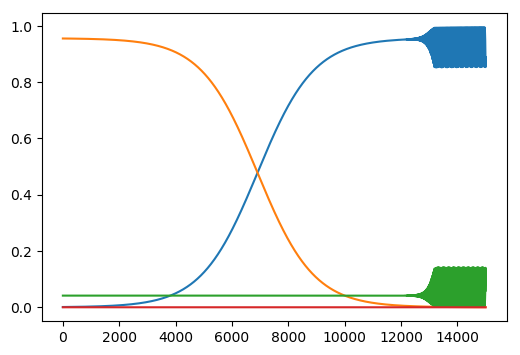

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147a409b0>
 PyObject <matplotlib.lines.Line2D object at 0x147a40b00>
 PyObject <matplotlib.lines.Line2D object at 0x147a40e80>
 PyObject <matplotlib.lines.Line2D object at 0x147a4d208>

In [7]:
# parameters=[alpha,beta,s] initial conds=[X0, Xs, Y, p]
hh = ContinuousDynamicalSystem(immune!, [0.001*tr[end,2], 0.999*tr[end,2], tr[end,3], tr[end,4], tr[end,5]], [10., 50., 0.001])
tr2 = trajectory(hh, 15000.0, dt = 1.)
t2=1:size(tr2)[1];
figure(figsize = (6,4))
p1=plot(t2,tr2[:,1],t2,tr2[:,2],t2,tr2[:,3],t2,tr2[:,5])

In [16]:
vect = ones(3000+size(tr)[1]+size(tr2)[1], 5)
vect[1,:]=[1.0 0.0 0.0 0.0 0.0]
for i in 1:3000
    vect[i,:]=[0.0 0.0 0.0 0.0 1.0]
end
    
for i in 3001:3000+size(tr)[1]
    vect[i,:]=tr[i-3000,:]
end

for i in 3001+size(tr)[1]:3000+size(tr)[1]+size(tr2)[1]
    vect[i,:]=tr2[i-3000-size(tr)[1],:]
end
tvar=1:size(vect)[1]

1:21002

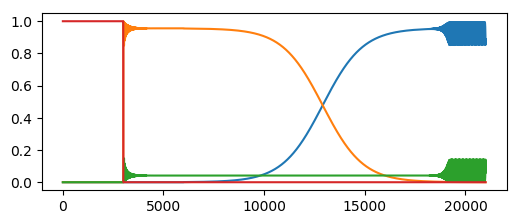

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1482816d8>
 PyObject <matplotlib.lines.Line2D object at 0x148281828>
 PyObject <matplotlib.lines.Line2D object at 0x148281ba8>
 PyObject <matplotlib.lines.Line2D object at 0x148281ef0>

In [17]:
figure(figsize = (6,2.3))
invplt=plot(tvar,vect[:,1],tvar,vect[:,2],tvar,vect[:,3],tvar,vect[:,5])
#savefig("imminv.eps")

In [18]:
function preventative!(dz, z, p, t)
    b=0.9;
    d=1.;
    kL=1.;
    alpha=p[1];
    beta=p[2];
    s=p[3];
    
    dz[1] = b*z[1]-z[1]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[2] = (b-s)*z[2]-z[2]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[3] = s*z[2]+(d-alpha*z[4]/(1-z[1]-z[2]+z[4]))*z[3]-z[3]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[4] = kL*beta*(1-z[1]-z[2]-z[3]-z[5])-alpha*(z[4]*(1-z[1]-z[2])/(1-z[1]-z[2]+z[4]))-z[4]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
    dz[5] = (d-alpha*z[4]/(1-z[1]-z[2]+z[4]))*z[5]-z[5]*(b*(z[1]+z[2])+d*(z[3]+z[5])-kL*(1-z[1]-z[2]-z[3]-z[5]))
 
    
    return nothing
end

preventative! (generic function with 1 method)

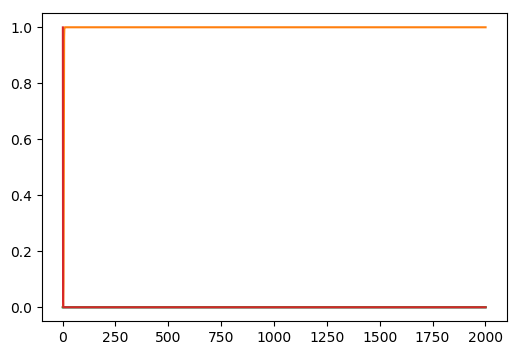

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x148472b70>
 PyObject <matplotlib.lines.Line2D object at 0x148472cc0>
 PyObject <matplotlib.lines.Line2D object at 0x14847e080>
 PyObject <matplotlib.lines.Line2D object at 0x14847e3c8>

In [19]:
# parameters=[alpha,beta,s] initial conds=[X0, Xs, Y, p]
hh = ContinuousDynamicalSystem(preventative!, [0., 0.001, 0.0, 0.001, 0.999], [10., 50., 0.001])
tr = trajectory(hh, 2000.0, dt = 1.)
t1=1:size(tr)[1];
figure(figsize = (6,4))
p1=plot(t1,tr[:,1],t1,tr[:,2],t1,tr[:,3],t1,tr[:,5])

In [20]:
tr[end,:]

5-element StaticArrays.SArray{Tuple{5},Float64,1,5}:
  0.0                   
  0.9993644061035397    
  0.00010380629137756199
  0.022698714363155417  
 -6.903281138001408e-67 

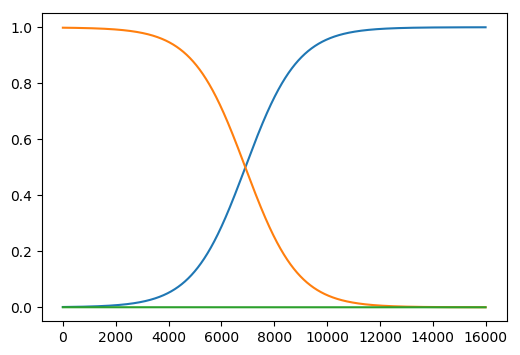

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1486305c0>
 PyObject <matplotlib.lines.Line2D object at 0x148630710>
 PyObject <matplotlib.lines.Line2D object at 0x148630a90>

In [21]:
# parameters=[alpha,beta,s] initial conds=[X0, Xs, Y, p]
hh = ContinuousDynamicalSystem(preventative!, [0.001*tr[end,2], 0.999*tr[end,2], tr[end,3], tr[end,4], tr[end,5]], [10., 50., 0.001])
tr2 = trajectory(hh, 16000.0, dt = 1.)
t2=1:size(tr2)[1];
figure(figsize = (6,4))
p1=plot(t2,tr2[:,1],t2,tr2[:,2],t2,tr2[:,3])

In [22]:
tr2[end,:]

5-element StaticArrays.SArray{Tuple{5},Float64,1,5}:
 0.9998875352525248    
 0.00011240999596005214
 8.321281145864134e-8  
 3.018695066490238e-6  
 0.0                   

In [23]:
function Pend!(dz, z, p, t)
    
    d=p[1];
    b=p[2];
    dz[1] = b*z[1]-z[1]*(d-(d-b)*z[1])
    dz[2] = d*z[2]-z[2]*(d-(d-b)*z[1])
    return nothing
end

Pend! (generic function with 1 method)

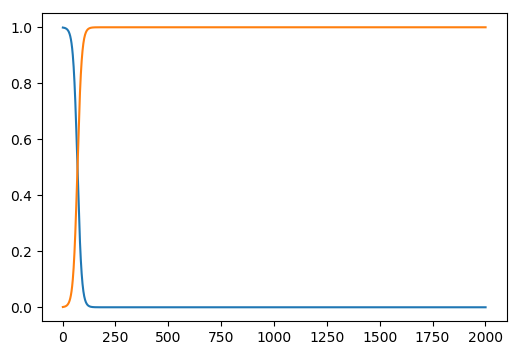

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x148f927f0>
 PyObject <matplotlib.lines.Line2D object at 0x148f92940>

In [24]:
# parameters=[alpha,beta,s] initial conds=[X0, Xs, Y, p]
hh = ContinuousDynamicalSystem(Pend!, [0.999, 0.001], [1., 0.9])
tr3 = trajectory(hh, 2000.0, dt = 1.)
t3=1:size(tr3)[1];
figure(figsize = (6,4))
p1=plot(t3,tr3[:,1],t3,tr3[:,2])

In [25]:
tr3[end,:]

2-element StaticArrays.SArray{Tuple{2},Float64,1,2}:
 2.870319684905741e-7
 0.9999997129670127  

In [26]:
vect = zeros(1000+size(tr)[1]+size(tr2)[1]+size(tr3)[1], 5)
for i in 1:1000
    vect[i,:]=[0.0 0.0 0.0 0.0 1.0]
end

for i in 1001:1000+size(tr)[1]
    vect[i,:]=tr[i-1000,:]
end

for i in 1001+size(tr)[1]:1000+size(tr)[1]+size(tr2)[1]
    vect[i,:]=tr2[i-1000-size(tr)[1],:]
end

for i in 1001+size(tr)[1]+size(tr2)[1]:1000+size(tr)[1]+size(tr2)[1]+size(tr3)[1]
    vect[i,1]=tr3[i-1000-size(tr)[1]-size(tr2)[1],1]
    vect[i,5]=tr3[i-1000-size(tr)[1]-size(tr2)[1],2]
end

tvar=1:size(vect)[1]

1:21003

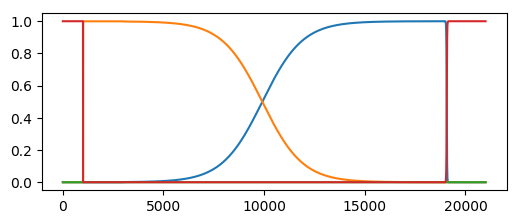

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x148ff7828>
 PyObject <matplotlib.lines.Line2D object at 0x148ff7978>
 PyObject <matplotlib.lines.Line2D object at 0x148ff7cf8>
 PyObject <matplotlib.lines.Line2D object at 0x148fff080>

In [27]:
figure(figsize = (6,2.3))
invplt=plot(tvar,vect[:,1],tvar,vect[:,2],tvar,vect[:,3],tvar,vect[:,5])
#savefig("preinv.eps")